#          Step  01:

# 1. Import Data set

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('ML 10_weight-height.csv')
df.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


# ----- Encoding (using Label Encoder) ----

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Gender=le.fit_transform(df.Gender)
df.head()
#df.info()

Gender     Height      Weight
0       1  73.847017  241.893563
1       1  68.781904  162.310473
2       1  74.110105  212.740856
3       1  71.730978  220.042470
4       1  69.881796  206.349801

# 2. Spperate x(Gender, Height) and y(weight)

In [5]:
x=df.drop('Weight', axis=1)
y=df['Weight']

# 3. Split Data (   Train = 70% , Test -= 30%   )

In [6]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=.70,random_state=42)

# 4. Apply Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

# 5. Evaluate Linear Regression Model (Accuracy, MSE, MAE)

In [8]:
pred_lr=lr.predict(xtest)

In [9]:
lr.score(xtest,ytest)                              # Accuracy of the LR

0.905911242442266

In [10]:
from sklearn.metrics import mean_squared_error       #  MSE of the LR
mse_lr = mean_squared_error(ytest, pred_lr)
mse_lr

96.83734437830606

In [11]:
from sklearn.metrics import mean_absolute_error       #  MAE of the LR
mae_lr = mean_absolute_error(ytest,pred_lr)
mae_lr

7.870097130738319

# 6. Apply KNN Regressor

In [12]:
from sklearn.neighbors import KNeighborsRegressor
knn_r = KNeighborsRegressor()
knn_r.fit(xtrain,ytrain)
knn_r.score(xtest,ytest)

0.8821086423439015

# 7. Evaluate KNN Regression Model (Accuracy, MSE, MAE)

In [13]:
pred_knn_r=knn_r.predict(xtest)

In [14]:
knn_r.score(xtest,ytest)                        # Accuracy Test

0.8821086423439015

In [15]:
mse_knn_r=mean_squared_error(ytest,pred_knn_r)    # MSE of the KNN
mse_knn_r

121.33528273624482

In [16]:
mae_knn_r=mean_absolute_error(ytest,pred_knn_r)     # MAE of the KNN
mae_knn_r

8.809865583894819

# Tuning

# 1. Apply Randomized Search CV to Select the best K value

In [17]:
K=np.random.randint(5,30,5)
Weight = ['uniform', 'distance']
Algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
Leaf_size = np.random.randint(5,50,5)
P = [1,2]

In [18]:
ids={
    'n_neighbors' : K,
    'weights' : Weight,
    'algorithm' : Algorithm,
    'leaf_size' : Leaf_size,
    'p' : P
}

In [19]:
from sklearn.model_selection import RandomizedSearchCV
rscv=RandomizedSearchCV(knn_r,ids,n_iter=150,cv=3)
rscv.fit(xtrain,ytrain)
rscv.best_score_

0.8921070877137424

In [20]:
rscv.best_params_     

{'weights': 'uniform',
 'p': 1,
 'n_neighbors': 23,
 'leaf_size': 45,
 'algorithm': 'kd_tree'}

# Using Best Parameters

In [21]:
knn_r_T = KNeighborsRegressor(n_neighbors = 25, weights= 'uniform',algorithm = 'brute',leaf_size = 13, p=1  )
knn_r_T.fit(xtrain,ytrain) 
knn_r_T.score(xtest,ytest)
knn_r_T.fit(xtrain,ytrain) 
knn_r_T.score(xtest,ytest)

0.9018971380116633

# 2. Compare Accuracy with default KNN & After Tuning K value

In [22]:
knn_r_T.score(xtest,ytest) - knn_r.score(xtest,ytest)

0.019788495667761752

# 3. Evaluate Model (Accuracy, MSE, MAE) and compare with old KNN model and Linear Regression as well

# Evaluate the Tuned KNN model

In [23]:
knn_r_T.score(xtest,ytest)                                     # Accuracy of the Tuned KNN model

0.9018971380116633

In [24]:
pred_knn_r_T=knn_r_T.predict(xtest)
mse_knn_r_T = mean_squared_error(ytest , knn_r_T.predict(xtest))   # MSE of the Tuned KNN
mse_knn_r_T

100.968711644775

In [25]:
mae_knn_r_T = mean_absolute_error(ytest , knn_r_T.predict(xtest))   # MAE of the Tuned KNN
mae_knn_r_T

8.040950615418621

# compare with old KNN model and Linear Regression as well

In [26]:
knn_r.score(xtest,ytest) -  lr.score(xtest,ytest)        # Difference Between Accuracy of the Tuned KNN & Linear Regression

-0.023802600098364435

In [27]:
mse_knn_r - mse_lr                                        # Difference of MSE Between KNN & Linear Regression

24.497938357938764

In [28]:
mae_knn_r - mae_lr                                        # Difference of MAE Between KNN & Linear Regression

0.9397684531564998

# Step 02:

# 1. Import Data Set

In [29]:
import pandas as pd
import numpy as np

In [30]:
df2=pd.read_csv('ML 10_weight-height.csv')
df2.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

In [31]:
#df2.info()

# 2. Seperate x and y   (y=Gender)

In [32]:
x2=df2.drop('Gender',axis=1)
y2=df2['Gender']

# 3. Split Data (   Train = 70% , Test -= 30%   )

In [33]:
from sklearn.model_selection import train_test_split
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x2,y2,train_size=.70,random_state=42)

# 4. Apply KNN Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(xtrain2,ytrain2)

KNeighborsClassifier()

# 5. Evaluate Model (Accuracy, Confusion Matrix, ROC, AUC, Classification Report)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_roc_curve , roc_auc_score, classification_report
pred_knn_clf=knn_clf.predict(xtest2) 

#                               Accuracy: KNN Clasifier

In [36]:
knn_clf.score(xtest2,ytest2)             

0.9131281651733542

In [37]:
#    or
ac=accuracy_score(ytest2,pred_knn_clf)
ac

0.9131281651733542

# Confusion Matrix

In [38]:
conmat=confusion_matrix(ytest2,pred_knn_clf)
conmat

array([[ 945,  121],
       [ 102, 1399]], dtype=int64)

<AxesSubplot:>

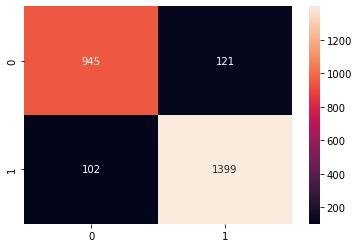

In [39]:
import seaborn as sns
sns.heatmap(conmat,annot=True,fmt='d')

# ROC   &   AUC

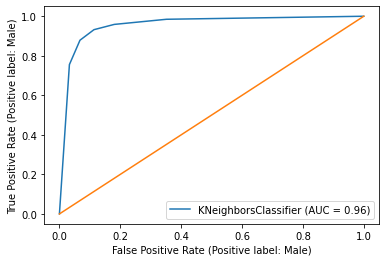

In [40]:
import matplotlib.pyplot as plt
plot_roc_curve(knn_clf,xtest2,ytest2)
plt.plot([0,1],[0,1])

# Classification Report

In [41]:
print(classification_report(ytest2,pred_knn_clf))

              precision    recall  f1-score   support

      Female       0.90      0.89      0.89      1066
        Male       0.92      0.93      0.93      1501

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567

